In [2]:
install.packages("cowplot")
install.packages("kknn")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [3]:
library(tidyverse)
library(tidymodels)
library(repr)
library(scales)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [4]:
wine <- read_csv('https://raw.githubusercontent.com/qinhan099/DSCI100_Group15_Spotify/main/winequality-red.csv')
any(is.na(wine))

Rows: 1599 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (12): fixed_acidity, volatile_acidity, citric_acid, residual_sugar, chlo...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] FALSE

In [5]:
t <- wine %>%
    mutate(quality = as.factor(quality))
head(t, n = 5)

fixed_acidity volatile_acidity citric_acid residual_sugar chlorides
1  7.4          0.70             0.00        1.9            0.076    
2  7.8          0.88             0.00        2.6            0.098    
3  7.8          0.76             0.04        2.3            0.092    
4 11.2          0.28             0.56        1.9            0.075    
5  7.4          0.70             0.00        1.9            0.076    
  free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates alcohol
1 11                  34                   0.9978  3.51 0.56      9.4    
2 25                  67                   0.9968  3.20 0.68      9.8    
3 15                  54                   0.9970  3.26 0.65      9.8    
4 17                  60                   0.9980  3.16 0.58      9.8    
5 11                  34                   0.9978  3.51 0.56      9.4    
  quality
1 5      
2 5      
3 5      
4 6      
5 5

Initially, we started by reading the csv file into Jupyter, checks whether there are any NA values (FALSE indicates no NA values), and mutating the column quality to the factor type.

In [1]:
set.seed(20)
wine_split <- initial_split(t, prop = 0.75, strata = quality)
wine_train <- training(wine_split)
wine_test <- testing(wine_split) 

ERROR: Error in initial_split(t, prop = 0.75, strata = quality): could not find function "initial_split"


Then, we split the data into two with a 75% proportion for the training data (wine_train) and the rest would then be the testing data (wine_test). 

In [7]:
plot_volatile_acidity <- ggplot(wine_train, aes(y=volatile_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="volatile acidity")+
    ggtitle("Figure 1: Box plot of volatile acidity versus quality.")

In [8]:
plot_fixed_acidity <- ggplot(wine_train, aes(y=fixed_acidity, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="fixed acidity")+
    ggtitle("Figure 2: Box plot of fixed acidity versus quality.")

In [9]:
plot_citric_acid <- ggplot(wine_train, aes(y=citric_acid, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="citric acid")+
    ggtitle("Figure 3: Box plot of citric acid versus quality.")

In [10]:
plot_residual_sugar <- ggplot(wine_train, aes(y=residual_sugar, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="residual sugar")+
    ggtitle("Figure 4: Box plot of residual sugar versus quality.")

In [11]:
plot_chlorides <- ggplot(wine_train, aes(y=chlorides, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="chlorides")+
    ggtitle("Figure 5: Box plot of chlorides versus quality.")

In [12]:
plot_free_sulfur_dioxide <- ggplot(wine_train, aes(y=free_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free sulfur dioxide")+
    ggtitle("Figure 6: Box plot of free sulfur dioxide versus quality.")

In [13]:
plot_total_sulfur_dioxide <- ggplot(wine_train, aes(y=total_sulfur_dioxide, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="free total sulfur dioxide")+
    ggtitle("Figure 7: Box plot of free total sulfur dioxide versus quality.")

In [14]:
plot_density <- ggplot(wine_train, aes(y=density, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="density dioxide")+
    ggtitle("Figure 8: Box plot of density versus quality.")

In [15]:
plot_pH <- ggplot(wine_train, aes(y=pH, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="pH")+
    ggtitle("Figure 9: Box plot of pH versus quality.")

In [16]:
plot_sulphates <- ggplot(wine_train, aes(y=sulphates, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="sulphates")+
    ggtitle("Figure 10: Box plot of sulphates versus quality.")

In [17]:
plot_alcohol <- ggplot(wine_train, aes(y=alcohol, x=quality, fill = quality)) + 
    geom_boxplot()+
    labs(x="quality of red wine",y="alcohol")+
    ggtitle("Figure 11: Box plot of alcohol versus quality.")

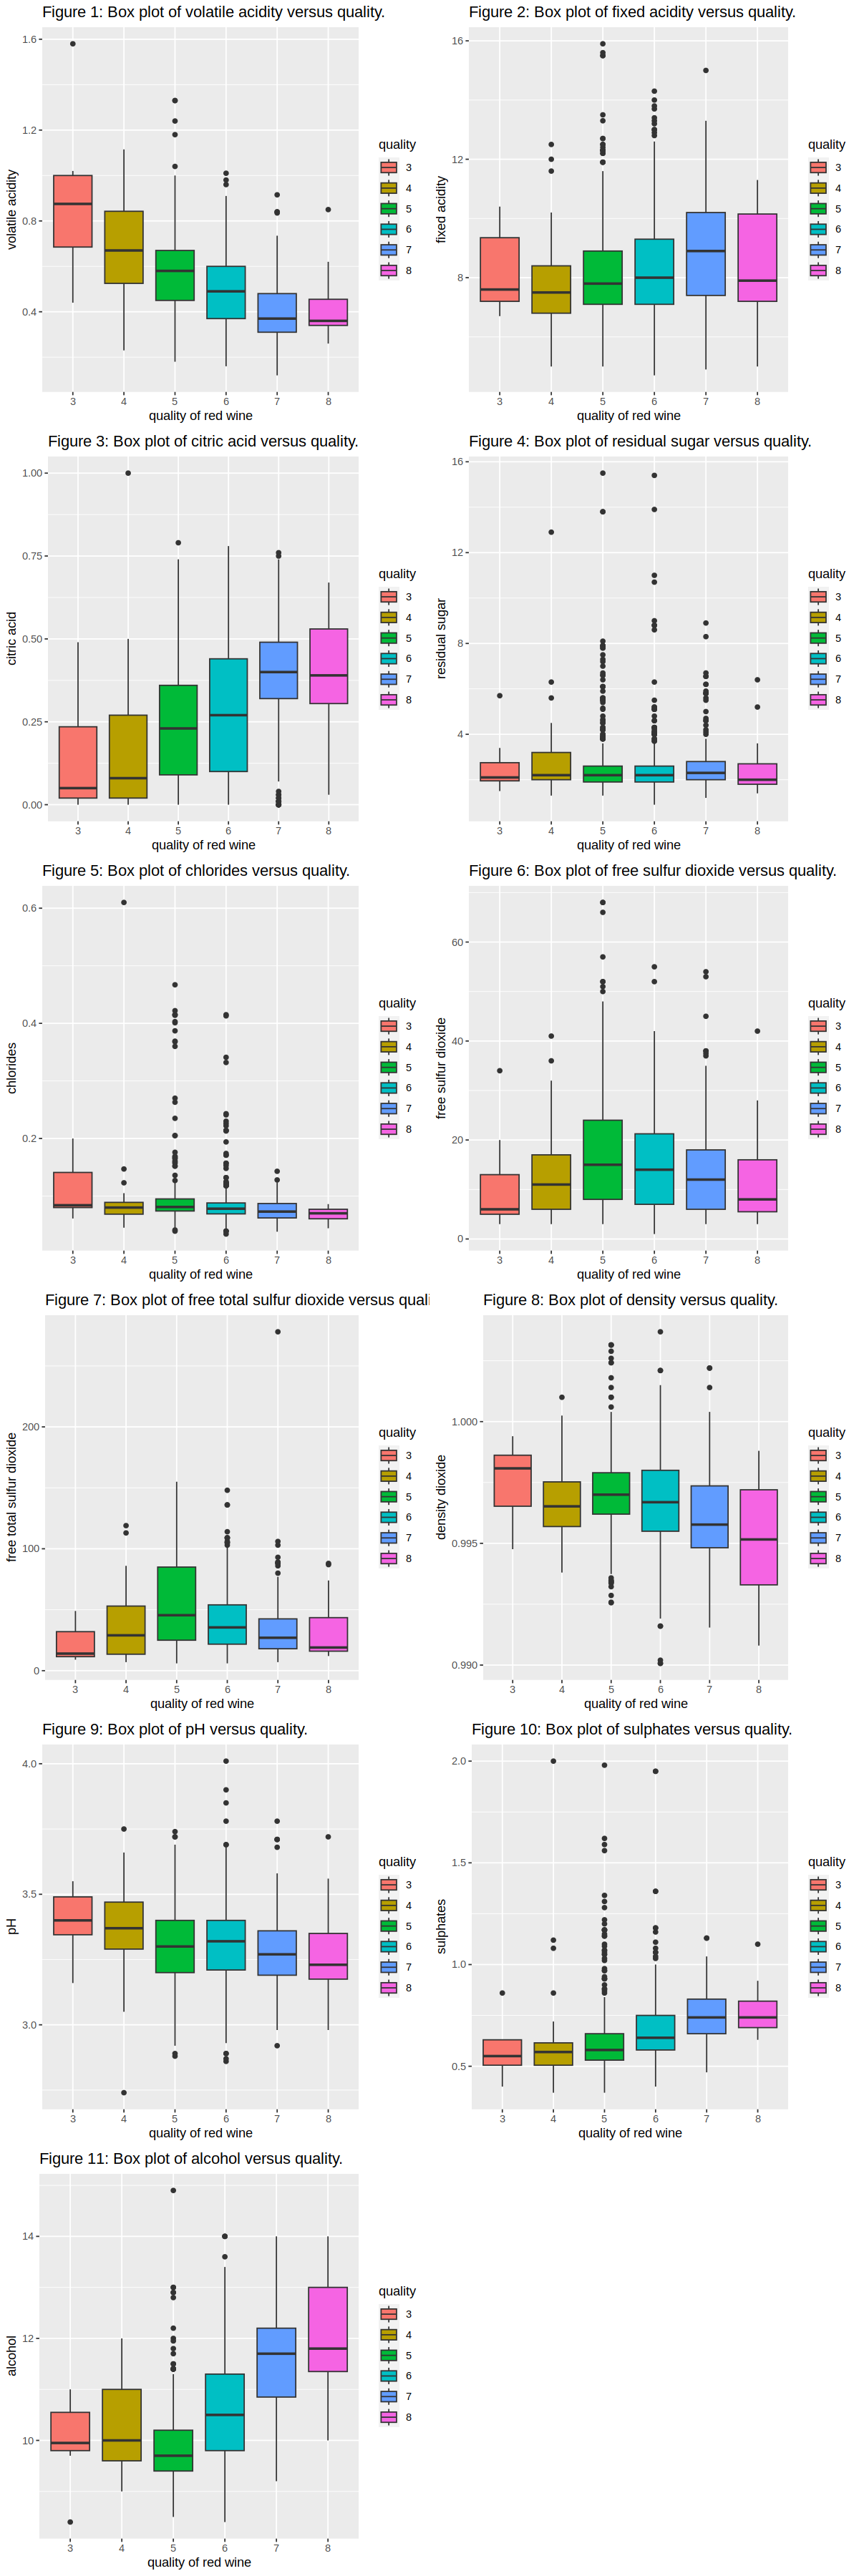

In [18]:
options(repr.plot.width=10, repr.plot.height=30)
plot_grid(plot_volatile_acidity , plot_fixed_acidity,
          plot_citric_acid, plot_residual_sugar, 
          plot_chlorides, plot_free_sulfur_dioxide,
          plot_total_sulfur_dioxide , plot_density,
          plot_pH, plot_sulphates,
          plot_alcohol,ncol = 2)
          

For our exploratory data analysis, we decided to create a box plot visualization for every potential predictor, with the aim to select roughly a few most influential predictors for our final data analysis. Each box plot is created from the training data with the y axis set to whichever predictor you're specifically looking at, it is also important to note that each quality score in a plot is denoted by a different colour. For the first box plot, the median for each score quality is significantly different, forming a pattern where the decrease in volatile acidity leads to higher quality score. For the second box plot, the median for each score slightly fluctuates, however they don't show significant difference. For the third box plot, the median for each score is significant different, creating a pattern where the increase of citric acid leads to the increase of quality score. For the fourth and fifth plot, the median for each is relatively unchanged and looks odd as there are too many outliers. For the six and seventh plot, the median for each score slightly varies, creating a pattern where an increase in free sulfur dioxide and free total sulfur dioxide lead to an increase in quality score peaking at the quality of 5 before a decrease in predictors lowers the quality score. For the eighth and ninth plot, the median for each score fluctuates where the smaller quality score tend to have a higher density dioxide or pH respectively, however the difference between each box is not significant. For the tenth plot, the increase in sulphates leads to an increase in quality, however the difference between each median is relatively small. For the eleventh plot, the median for each score is highly different, creating a pattern where the increase in alcohol leads to a higher score despite dipping down at the quality of 5. From all plots, it can be concluded that the most influential is citric acid, volatile acidity, and alcohol while other potential predictor might have variation in the median for each plot, those are small in value or not too significant compared to those three. The visualizations for the exploratory data analysis leads us to those three predictors for our final model.

In [19]:
set.seed(2020)
k_vals <- tibble(neighbors = seq(from = 1, to = 15, by=1))
wine_vfold <- vfold_cv(wine_train, v = 5, strata = quality)

wine_recipe <- recipe(quality ~ citric_acid + volatile_acidity + alcohol, 
                        data = wine_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", 
                             neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

knn_fit <- workflow() |>
  add_recipe(wine_recipe) |>
  add_model(knn_spec) |>
  tune_grid(resamples = wine_vfold, grid=k_vals)

accuracies1 <- knn_fit %>% collect_metrics()


accuracies <- accuracies1 |>
  filter(.metric == "accuracy")


! Fold3: internal:
  There were 15 warnings in `dplyr::summarise()`.
  The first warning was:
  ℹ In argument: `.estimate = metric_fn(...)`.
  ℹ In group 1: `neighbors = 1`.
  Caused by warning:
  ! No observations were detected in `truth` for level(s): '3'
  Computation will proceed by ignoring those levels.
  ℹ Run `dplyr::last_dplyr_warnings()` to see the 14 ...



Warning message in geom_histogram(stat = "count"):
“Ignoring unknown parameters: `binwidth`, `bins`, and `pad`”


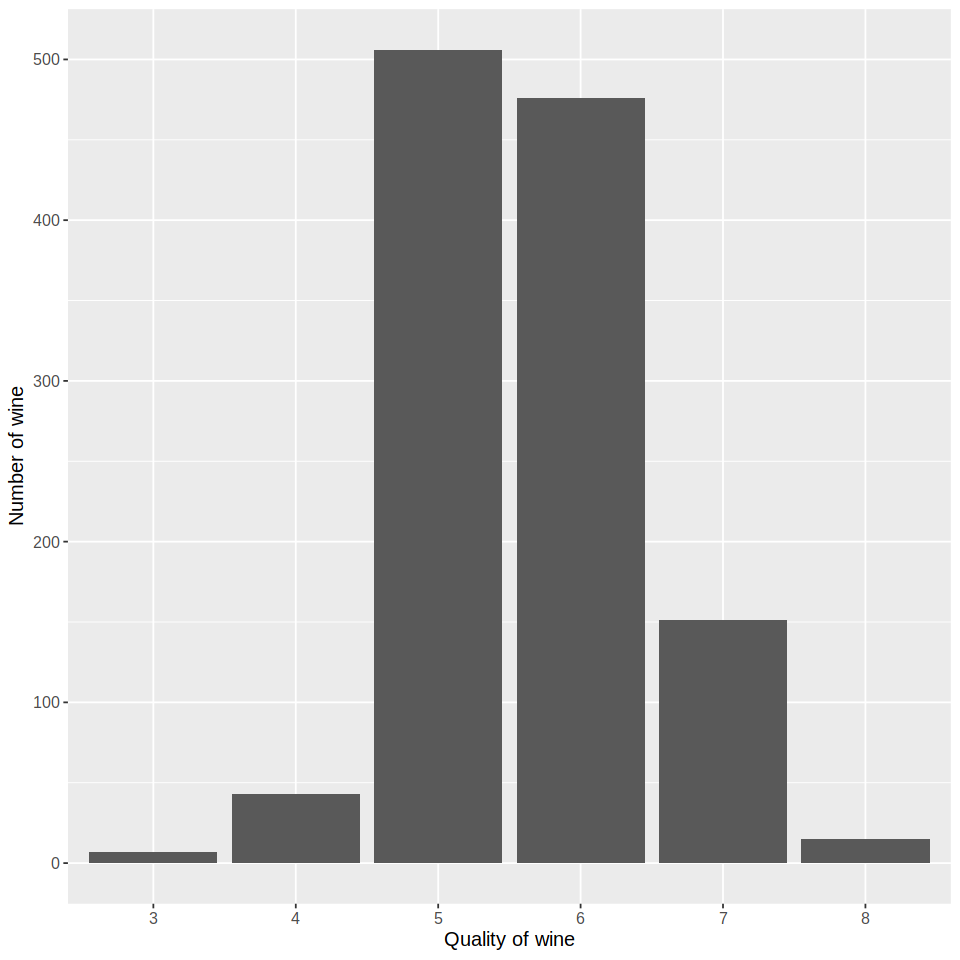

In [29]:
options(repr.plot.width=8, repr.plot.height=8)
quality_plot <- ggplot(wine_train, aes(x=quality)) + 
    geom_histogram(stat="count") +
    labs(x = "Quality of wine", y = "Number of wine") +
    theme(text = element_text (size = 12))

quality_plot

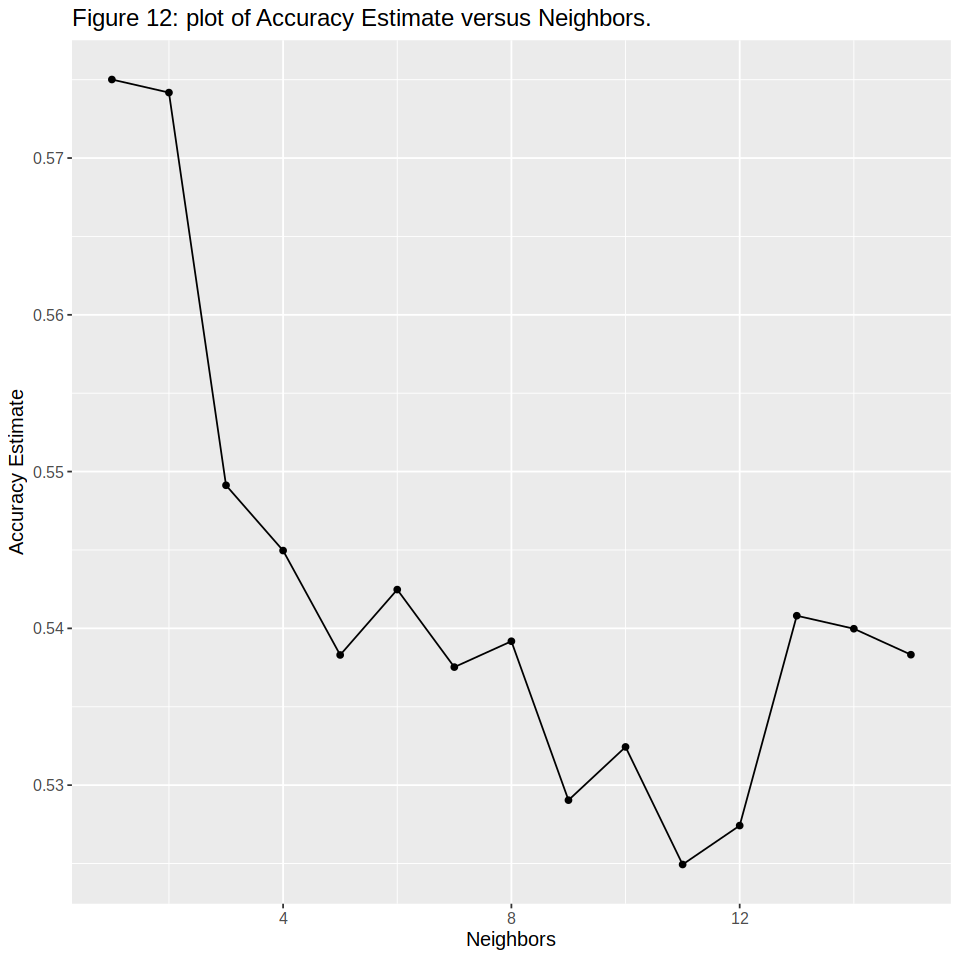

In [20]:
options(repr.plot.width=8, repr.plot.height=8)
accuracy_vs_k <- ggplot(accuracies, aes(x = neighbors, y = mean)) +
  geom_point() +
  geom_line() +
  labs(x = "Neighbors", y = "Accuracy Estimate") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 12: plot of Accuracy Estimate versus Neighbors.")

accuracy_vs_k

In [21]:
set.seed(2020)
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 2) |>
       set_engine("kknn") |>
       set_mode("classification")

wine_fit <- workflow() |>
       add_recipe(wine_recipe) |>
       add_model(knn_spec) |>
       fit(data = wine_train)
wine_fit

══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(2,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.4457429
Best kernel: rectangular
Best k: 2

In [22]:
set.seed(2020)
wine_test_predictions <- predict(wine_fit , wine_test) |>
       bind_cols(wine_test)

head(wine_test_predictions, n = 5)

.pred_class fixed_acidity volatile_acidity citric_acid residual_sugar
1 5           7.8           0.580            0.02        2.0           
2 5           5.6           0.615            0.00        1.6           
3 5           8.9           0.620            0.19        3.9           
4 7           7.6           0.390            0.31        2.3           
5 6           7.9           0.430            0.21        1.6           
  chlorides free_sulfur_dioxide total_sulfur_dioxide density pH   sulphates
1 0.073      9                   18                  0.9968  3.36 0.57     
2 0.089     16                   59                  0.9943  3.58 0.52     
3 0.170     51                  148                  0.9986  3.17 0.93     
4 0.082     23                   71                  0.9982  3.52 0.65     
5 0.106     10                   37                  0.9966  3.17 0.91     
  alcohol quality
1 9.5     7      
2 9.9     5      
3 9.2     5      
4 9.7     5      
5 9.5     5

In [23]:
set.seed(2020) 
wine_prediction_accuracy <- wine_test_predictions |>
         metrics(truth = quality, estimate = .pred_class) 
wine_prediction_accuracy


.metric  .estimator .estimate
1 accuracy multiclass 0.5885287
2 kap      multiclass 0.3492437

In [24]:
set.seed(2020)
wine_mat <- wine_test_predictions |> 
       conf_mat(truth = quality, estimate = .pred_class)
wine_mat

          Truth
Prediction   3   4   5   6   7   8
         3   0   1   0   0   0   0
         4   1   1   8   4   1   0
         5   2   4 115  48   7   1
         6   0   3  49  94  12   2
         7   0   1   3  13  26   0
         8   0   0   0   3   2   0

In [25]:
volatile_acidity_vs_citric_acid_prediction <- wine_test_predictions |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 12: Scatter plot of citric acid versus volatile acidity using predicting data.")

volatile_acidity_vs_citric_acid <- wine_test |>
  ggplot(aes(x = volatile_acidity, y = citric_acid, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 13: Scatter plot of citric acid versus volatile acidity using predicting data.")


volatile_acidity_vs_alcohol_prediction <- wine_test_predictions |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 14: Scatter plot of alcohol versus volatile acidity using predicting data.")

volatile_acidity_vs_alcohol <- wine_test |>
  ggplot(aes(x = volatile_acidity, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 15: Scatter plot of alcohol versus volatile acidity using predicting data.")

citric_acid_vs_alcohol_prediction <- wine_test_predictions |>
  ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 16: Scatter plot of citric acid versus alcohol using predicting data.")

citric_acid_vs_alcohol <- wine_test |>
  ggplot(aes(x = citric_acid, y = alcohol, color = quality)) +
  geom_point(alpha = 0.5) +
  labs(color = "quality") + 
  theme(text = element_text(size = 12))+
    ggtitle("Figure 17: Scatter plot of citric acid versus alcohol using predicting data.")


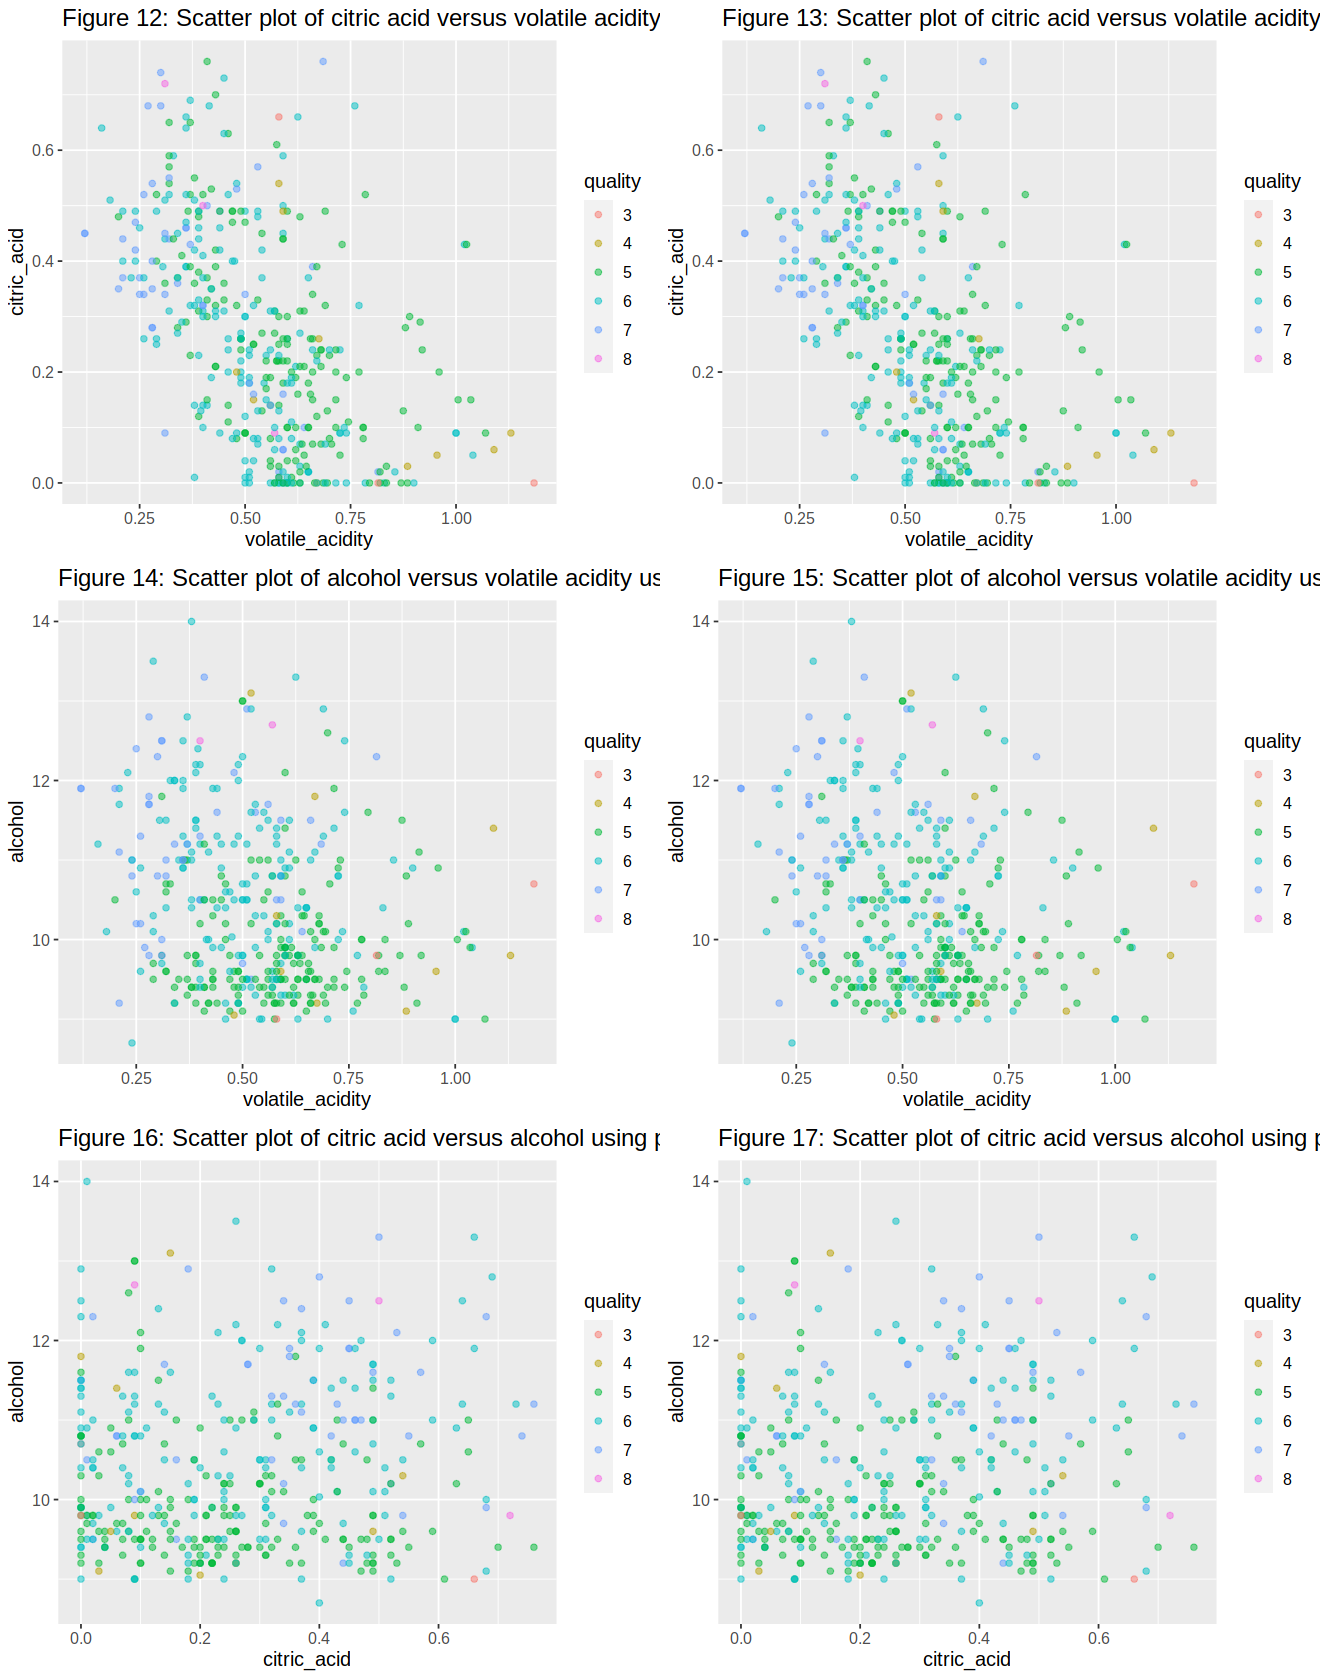

In [26]:
options(repr.plot.width=11, repr.plot.height=14)
plot_grid(volatile_acidity_vs_citric_acid_prediction , volatile_acidity_vs_citric_acid, 
          volatile_acidity_vs_alcohol_prediction , volatile_acidity_vs_alcohol,
          citric_acid_vs_alcohol_prediction, citric_acid_vs_alcohol,
          ncol = 2)

DISCUSSION